In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
from matplotlib.colors import cnames
from bokeh.plotting import figure, ColumnDataSource, show, output_notebook, output_file
from bokeh.models import HoverTool
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline
#%matplotlib widget

Loading BokehJS ...

In [2]:
#Importation de la base de données
from pandas import read_excel
base = read_excel('C:/Users/simon/Desktop/Notebook_Jupyter/base_squad2.xlsx', 'BASE')

In [3]:
#Suppression de variables non importantes et présentant des données manquantes dans la base 
#(Utile pour la partie Apprentissage supervisé)
base = base.drop(columns=["string_field_55","FLX_ANN_MOI","BEN_RES_REG","PRS_ACT_NBR","FLT_ACT_NBR"])

In [4]:
#Sélection des variables quantitatives
base[[ 'PRS_ACT_COG','PRS_ACT_QTE','PRS_DEP_MNT', 'PRS_PAI_MNT', 'PRS_REM_BSE', 'PRS_REM_MNT','FLT_ACT_COG','FLT_ACT_QTE',
       'FLT_PAI_MNT','FLT_DEP_MNT', 'FLT_REM_MNT', 'PRS_REM_TAU']] = base[[ 'PRS_ACT_COG','PRS_ACT_QTE','PRS_DEP_MNT', 
                                                                            'PRS_PAI_MNT', 'PRS_REM_BSE', 'PRS_REM_MNT',
                                                                            'FLT_ACT_COG','FLT_ACT_QTE', 'FLT_PAI_MNT',
                                                                            'FLT_DEP_MNT', 'FLT_REM_MNT',
                                                                            'PRS_REM_TAU']].astype("float64")

In [5]:
#Sélection des variables qualitatives
base[['BEN_CMU_TOP', 'BEN_QLT_COD','BEN_SEX_COD', 'DDP_SPE_COD', 'ASU_NAT','EXO_MTF', 'PRS_NAT', 'PRS_PPU_SEC','PRS_REM_TYP',
      'EXE_INS_REG','ORG_CLE_REG','PRE_INS_REG','DRG_AFF_NAT','PSE_STJ_SNDS','ETE_REG_COD',
      'ETE_TYP_SNDS','SOI_MOI']] = base[['BEN_CMU_TOP', 'BEN_QLT_COD','BEN_SEX_COD', 'DDP_SPE_COD','ASU_NAT','EXO_MTF', 
                                         'PRS_NAT', 'PRS_PPU_SEC','PRS_REM_TYP','EXE_INS_REG','ORG_CLE_REG','PRE_INS_REG',
                                         'DRG_AFF_NAT','PSE_STJ_SNDS','ETE_REG_COD','ETE_TYP_SNDS',
                                         'SOI_MOI']].astype("category")

In [6]:
#Création d'une copie de la base avec les variables préselectionnées
base_copy = base[['PRS_ACT_COG','PRS_ACT_QTE','PRS_DEP_MNT', 'PRS_PAI_MNT', 'PRS_REM_BSE', 'PRS_REM_MNT','FLT_ACT_COG',
                  'FLT_ACT_QTE', 'FLT_PAI_MNT','FLT_DEP_MNT', 'FLT_REM_MNT', 'PRS_REM_TAU','BEN_CMU_TOP', 'BEN_QLT_COD',
                  'BEN_SEX_COD', 'DDP_SPE_COD', 'ASU_NAT','EXO_MTF', 'PRS_NAT', 'PRS_PPU_SEC','PRS_REM_TYP','EXE_INS_REG',
                  'ORG_CLE_REG','PRE_INS_REG','DRG_AFF_NAT','PSE_STJ_SNDS','ETE_REG_COD','ETE_TYP_SNDS','SOI_MOI']]

In [7]:
#Scaling continous and Get Dummies on categorial variables

from sklearn.preprocessing import StandardScaler

x_cat = base_copy.select_dtypes(include="category")
x_cat = pd.get_dummies(x_cat, drop_first=True)

In [8]:
#Sélection des variables de types "float64"
float_var = base_copy.select_dtypes(include = "float64")
scaler = StandardScaler()

#Utilisation du standard scaler
float_var = scaler.fit_transform(float_var)

#Transformation en type dataframe
float_var = pd.DataFrame(float_var)

#Réaffectation des index et des noms des colonnes 
float_var = float_var.set_index(base.index)
float_var.columns = base.select_dtypes(include = "float64").columns 

In [9]:
#Création de la base de données scaler en combinant les deux bases précédentes "x_cat & float_var"
base_scaled = pd.concat([x_cat,float_var], axis = 1)

In [10]:
#Suppression des valeurs manquantes
base_scaled = base_scaled.dropna()

In [11]:
#Dimension de la base de données finale
base_scaled.shape

(204499, 149)

In [12]:
base_scaled.head()

,BEN_CMU_TOP_1,BEN_CMU_TOP_9,BEN_QLT_COD_2,BEN_QLT_COD_3,BEN_QLT_COD_4,BEN_SEX_COD_2,BEN_SEX_COD_9,DDP_SPE_COD_11,DDP_SPE_COD_16,DDP_SPE_COD_21,...,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,PRS_REM_TAU
0,0,0,0,0,0,0,0,0,0,0,...,-0.176509,1.067279,0.113386,-0.002263,0.627605,0.627609,1.070678,-0.1761,-0.000659,-0.698783
1,0,0,0,0,0,1,0,0,0,0,...,-0.176509,-0.334930,-0.223940,-0.205524,-0.207999,-0.207995,-0.330511,-0.1761,-0.203883,-0.698783
2,0,0,0,0,0,0,0,0,0,0,...,-0.176509,-0.328870,-0.217351,-0.201554,0.878286,0.878290,-0.324455,-0.1761,-0.199914,-0.698783
3,0,0,0,0,0,0,0,0,0,0,...,-0.176509,3.474076,0.694483,0.347885,0.711166,0.711169,3.475726,-0.1761,0.349427,-0.698783
4,0,0,0,0,0,0,0,0,0,0,...,-0.176509,3.344365,0.628599,0.308185,0.711166,0.711169,3.346109,-0.1761,0.309735,-0.698783


In [13]:
font_size = 5
def get_float_list(range_max:int, div:int=100) -> list:
    """ To get 0 -> 1, range_max must be same order of mag as div """
    return [float(x)/div for x in range(int(range_max))]


def get_colorcycle(colordict:dict):
    """ Subset cnames with a string match and get a color cycle for plotting """
    return cycle(list(colordict.keys()))


def get_colordict(filter_:str='dark') -> dict:
    """ return dictionary of colornames by filter """
    return dict((k, v) for k, v in cnames.items() if filter_ in k)


def pca_report_interactive(X, scale_X:bool=False, save_plot:bool=False):
    """
    X:          input data matrix
    scale_X:    determine whether to rescale X (StandardScaler) [default: True, X is not prescaled
    save_plot:  save plot to file (html) and not show
    """
        # run PCA directly
    print("...Assuming data is properly scaled...")
    pca_ = PCA().fit(X)
    X_pca = PCA().fit_transform(X)
            
    # Get cumulative explained variance for each dimension
    pca_evr = pca_.explained_variance_ratio_
    cumsum_ = np.cumsum(pca_evr)
    
    # Get dimensions where var >= 95% and values for variance at 2D, 3D
    dim_95 = np.argmax(cumsum_ >= 0.95) + 1
    twoD = np.round(cumsum_[1], decimals=3)*100 
    threeD = np.round(cumsum_[2], decimals=3)*100
    instances_, dims_ =  X.shape
    
    # check shape of X
    if dims_ > instances_:
        print("WARNING: number of features greater than number of instances.")
        dimensions = list(range(1, instances_+1))
    else:
        dimensions = list(range(1, dims_+1))
    
    # Print report
    print("\n -- Summary --")
    print(f"You can reduce from {dims_} to {dim_95} dimensions while retaining 95% of variance.")
    print(f"2 principal components explain {twoD:.2f}% of variance.")
    print(f"3 principal components explain {threeD:.2f}% of variance.")
    
    """ - Plotting - """
    # Create custom HoverTool -- we'll name each ROC curve 'ROC' so we only see info on hover there
    hover_ = HoverTool(names=['PCA'], tooltips=[("dimensions", "@x_dim"), 
                                                ("cumulative variance", "@y_cumvar"),
                                                ("explained variance", "@y_var")])
    p_tools = [hover_, 'crosshair', 'zoom_in', 'zoom_out', 'save', 'reset', 'tap', 'box_zoom']

    # insert 0 at beginning for cleaner plotting
    cumsum_plot = np.insert(cumsum_, 0, 0) 
    pca_evr_plot = np.insert(pca_evr, 0, 0)
    dimensions_plot = np.insert(dimensions, 0, 0)

    """
    ColumnDataSource
    - a special type in Bokeh that allows you to store data for plotting
    - store data as dict (key:list)
    - to plot two keys against one another, make sure they're the same length!
    - below:
        x_dim    # of dimensions (length = # of dimensions)
        y_cumvar # cumulative variance (length = # of dimensions)
        var_95   # y = 0.95 (length = # of dimensions)
        zero_one # list of 0 to 1
        twoD     # x = 2 
        threeD   # x = 3 
    """ 
    
    # get sources
    source_PCA = ColumnDataSource(data=dict(x_dim = dimensions_plot,y_cumvar = cumsum_plot, y_var = pca_evr_plot))    
    source_var95 = ColumnDataSource(data=dict(var95_x = [dim_95]*96, var95_y = get_float_list(96)))
    source_twoD = ColumnDataSource(data=dict(twoD_x = [2]*(int(twoD)+1), twoD_y = get_float_list(twoD+1)))
    source_threeD = ColumnDataSource(data=dict(threeD_x = [3]*(int(threeD)+1), threeD_y = get_float_list(threeD+1)))

    """ PLOT """
    # set up figure and add axis labels
    p = figure(title='PCA Analysis', tools=p_tools)
    p.xaxis.axis_label = f'N of {dims_} Principal Components' 
    p.yaxis.axis_label = 'Variance Explained (per PC & Cumulative)'
    
    # add reference lines: y=0.95, x=2, x=3
    p.line('twoD_x', 'twoD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_twoD) # x=2
    p.line('threeD_x', 'threeD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_threeD) # x=3
    p.line('var95_x', 'var95_y', line_width=2, line_dash='dotted', color='#435363', source=source_var95) # var = 0.95

    # add bar plot for variance per dimension
    p.vbar(x='x_dim', top='y_var', width=.5, bottom=0, color='#D9F2EF', source=source_PCA, name='PCA')
    
    # add cumulative variance (scatter + line)
    p.line('x_dim', 'y_cumvar', line_width=1, color='#F79737', source=source_PCA)
    p.circle('x_dim', 'y_cumvar', size=7, color='#FF4C00', source=source_PCA, name='PCA')

    # change gridlines
    p.ygrid.grid_line_alpha = 0.25
    p.xgrid.grid_line_alpha = 0.25

    # change axis bounds and grid
    p.xaxis.bounds = (0, dims_)
    p.yaxis.bounds = (0, 1)
    p.grid.bounds = (0, dims_)
    
    plt.rcParams.update({'font.size': font_size})
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)  # fontsize of the figure title

    # save and show p
    if save_plot:
        output_file('PCA_analysis.html')
    show(p)
        
    # output PCA info as a dataframe
    df_PCA = pd.DataFrame({'dimension': dimensions, 'variance_cumulative': cumsum_, 'variance': pca_evr}).set_index(['dimension'])
        
    return df_PCA, X_pca, pca_evr


def pca_feature_correlation(X, X_pca, explained_var, features:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    1. Get dot product of X and X_pca
    2. Run normalizations of X*X_pca
    3. Retrieve df/matrices

    X:               data (numpy matrix)
    X_pca:           PCA
    explained_var:   explained variance matrix
    features:        list of feature names
    fig_dpi:         dpi to use for heatmaps
    save_plot:       save plot to file (html) and not show
    """
    
    # Add zeroes for data where features > instances
    outer_diff = X.T.shape[0] - X_pca.shape[1]
    if outer_diff > 0: # outer dims must match to get sq matrix
        Z = np.zeros([X_pca.shape[0], outer_diff])
        X_pca = np.c_[X_pca, Z]
        explained_var = np.append(explained_var, np.zeros(outer_diff))
    
    # Get correlation between original features (X) and PCs (X_pca)
    dot_matrix = np.dot(X.T, X_pca)
    print(f"X*X_pca: {X.T.shape} * {X_pca.shape} = {dot_matrix.shape}")
    
    # Correlation matrix -> df
    df_dotproduct = pd.DataFrame(dot_matrix)
    df_dotproduct.columns = [''.join(['PC', f'{i+1}']) for i in range(dot_matrix.shape[0])]
    if any(features): df_dotproduct.index = features    
    
    # Normalize & Sort
    df_n, df_na, df_nabv = normalize_dataframe(df_dotproduct, explained_var, plot_opt=True, save_plot=save_plot)
    
    return df_dotproduct, df_n, df_na, df_nabv


def normalize_dataframe(df, explained_var=None, fig_dpi:int=150, plot_opt:bool=True, save_plot:bool=False):
    """
    1. Get z-normalized df (normalized to µ=0, σ=1)
    2. Get absolute value of z-normalized df
    3. If explained_variance matrix provided, dot it w/ (2)
    """
    # Normalize, Reindex, & Sort
    df_norm = (df.copy()-df.mean())/df.std()
    df_norm = df_norm.sort_values(list(df_norm.columns), ascending=False)
    
    # Absolute value of normalized (& sort)
    df_abs = df_norm.copy().abs().set_index(df_norm.index)
    df_abs = df_abs.sort_values(by=list(df_abs.columns), ascending=False)
    
    # Plot
    if plot_opt:
        # Z-normalized corr matrix
        plt.figure(dpi=fig_dpi)
        ax_normal = sns.heatmap(df_norm, cmap="RdBu")
        ax_normal.set_title("Z-Normalized Data")
        plt.rcParams.update({'font.size': font_size})
        plt.rc('font', size=font_size)          # controls default text sizes
        plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
        plt.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
        plt.rc('legend', fontsize=font_size)    # legend fontsize
        plt.rc('figure', titlesize=font_size)  # fontsize of the figure title
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix.png')
        else:
            plt.show()

        # |Z-normalized corr matrix|  
        plt.figure(dpi=fig_dpi)
        ax_abs = sns.heatmap(df_abs, cmap="Purples")
        ax_abs.set_title("|Z-Normalized|")
        plt.rcParams.update({'font.size': font_size})
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix_Abs.png')
        else:
            plt.show()
        
    # Re-normalize by explained var (& sort)
    if explained_var.any():
        df_byvar = df_abs.copy()*explained_var
        df_byvar = df_byvar.sort_values(by=list(df_norm.columns), ascending=False)
        if plot_opt:
            plt.figure(dpi=fig_dpi)
            ax_relative = sns.heatmap(df_byvar, cmap="Purples")
            ax_relative.set_title("|Z-Normalized|*Explained_Variance")
            plt.rcParams.update({'font.size': font_size})
            if save_plot:
                plt.savefig('Normalized_corr_matrix.png')
            else:
                plt.show()
    else:
        df_byvar = None
    return df_norm, df_abs, df_byvar


def pca_rank_features(df_nabv, verbose:bool=True):
    """
    Given a dataframe df_nabv with dimensions [f, p], where:
        f = features (sorted)
        p = principal components
        df_nabv.values are |Z-normalized X|*pca_.explained_variance_ratio_
        
    1. Create column of sum of each row, sort by it 'score_'
    3. Set index as 'rank'
    """
    df_rank = df_nabv.copy().assign(score_ = df_nabv.sum(axis=1)).sort_values('score_', ascending=False)
    df_rank['feature_'] = df_rank.index
    df_rank.index = range(1, len(df_rank)+1)
    df_rank.drop(df_nabv.columns, axis=1, inplace=True)
    df_rank.index.rename('rank', inplace=True)
    if verbose: print(df_rank)
    return df_rank


def pca_full_report(X, features_:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    Run complete PCA workflow:
        1. pca_report_interactive()
        2. pca_feature_correlation()
        3. pca_rank_features()
        
    X:            data (numpy array)
    features_:    list of feature names
    fig_dpi:      image resolution
    
    """
    # Retrieve the interactive report
    df_pca, X_pca, pca_evr = pca_report_interactive(X, save_plot=save_plot)
    # Get feature-PC correlation matrices
    df_corr, df_n, df_na, df_nabv = pca_feature_correlation(X, X_pca, pca_evr, features_, fig_dpi, save_plot) 
    # Get rank for each feature
    df_rank = pca_rank_features(df_nabv)
    return (df_pca, X_pca, pca_evr, df_corr, df_n, df_na, df_nabv, df_rank)

In [14]:
#base_scaled.info

<bound method DataFrame.info of         BEN_CMU_TOP_1  BEN_CMU_TOP_9  BEN_QLT_COD_2  BEN_QLT_COD_3  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
204494              0              0              0              0   
204495              0              0              0              0   
204496              0              0              0              0   
204497              0              0              0              0   
204498              0              0              0              1   

        BEN_QLT_COD_4  BEN_SEX_COD_2  BEN_SEX_COD_9  DDP_SPE_COD_11  \
0                   0              0              0     

In [14]:
#Vérification du nombre de données manquantes par variables sur la base scaler ("base_scaled")
base_scaled.isna().sum()

ORG_CLE_REG_11    0
ORG_CLE_REG_24    0
ORG_CLE_REG_27    0
ORG_CLE_REG_28    0
ORG_CLE_REG_32    0
                 ..
FLT_ACT_QTE       0
FLT_PAI_MNT       0
FLT_DEP_MNT       0
FLT_REM_MNT       0
PRS_REM_TAU       0
Length: 149, dtype: int64

In [15]:
#Création d'une copie de la base de donnée base_scaled
basewonawoindic = base_scaled.copy()

In [16]:
#Permet de mettre toutes les variables de la base "basewonawoindic" en type float
basewonawoindic = basewonawoindic.astype("float64")

In [18]:
#Option de pandas permettant d'afficher toutes les lignes d'un dataframe ou d'une table numpy
pd.options.display.max_rows = None

In [19]:
#Rapport d'analyse ACP
pca = PCA(2)
#Permet de centrer les données et d'obtenir une matrice (obligatoire pour effectuer une ACP)
X_pca = pca.fit_transform(basewonawoindic)
X_pca

array([[ 1.50918808,  1.31550452],
       [-0.75498467,  0.88670549],
       [ 0.6800083 ,  1.7488343 ],
       ...,
       [-1.43285678,  0.47667951],
       [-1.28107704,  0.72877055],
       [-1.23127612,  0.53621627]])

...Assuming data is properly scaled...

 -- Summary --
You can reduce from 149 to 24 dimensions while retaining 95% of variance.
2 principal components explain 53.20% of variance.
3 principal components explain 64.80% of variance.


X*X_pca: (149, 204499) * (204499, 149) = (149, 149)


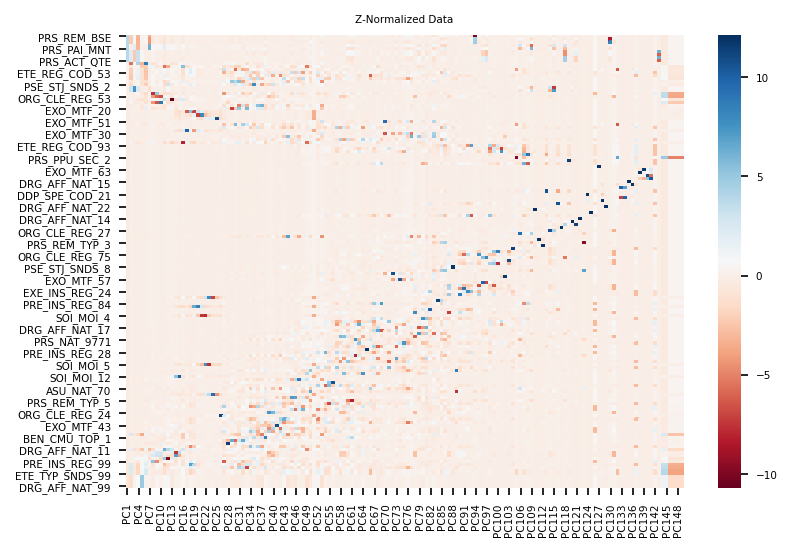

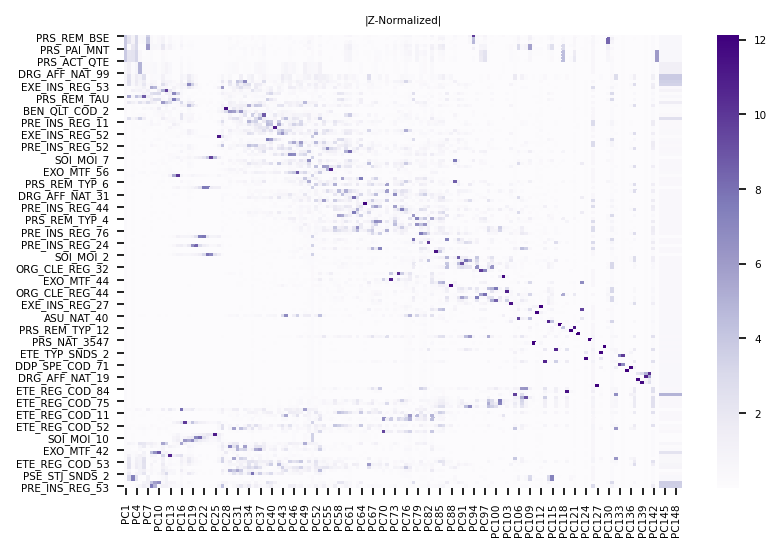

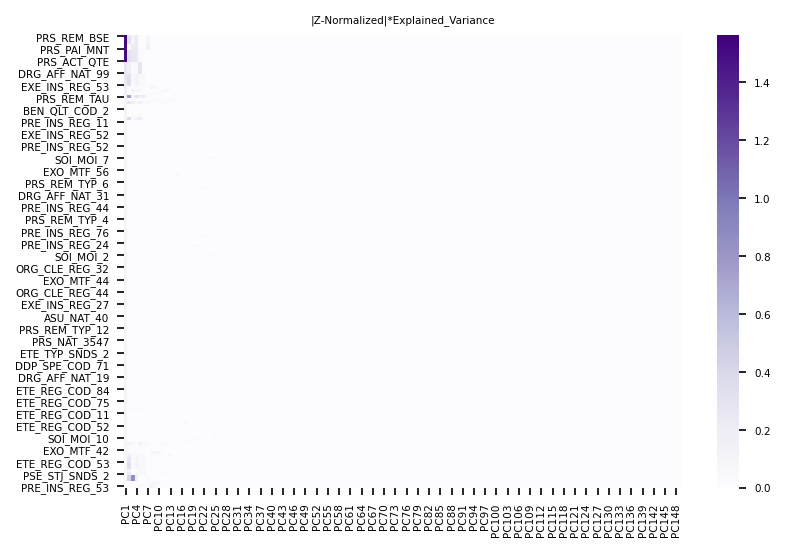

        score_         feature_
rank                           
1     2.390152      PRS_ACT_COG
2     2.390144      PRS_ACT_QTE
3     2.386528      FLT_ACT_COG
4     2.386521      FLT_ACT_QTE
5     2.348347      PRS_REM_MNT
6     2.345425      FLT_REM_MNT
7     2.326818      PRS_REM_BSE
8     2.200392      FLT_PAI_MNT
9     2.195480      PRS_PAI_MNT
10    1.796381      PRS_REM_TAU
11    1.560987      FLT_DEP_MNT
12    1.560118      PRS_DEP_MNT
13    1.031686   DRG_AFF_NAT_11
14    1.017204   EXE_INS_REG_53
15    1.008250     PRS_NAT_3541
16    1.005775  DDP_SPE_COD_121
17    0.964203  ETE_TYP_SNDS_99
18    0.964203   ETE_REG_COD_99
19    0.887034   PRS_REM_TYP_99
20    0.887034       EXO_MTF_99
21    0.887034    BEN_CMU_TOP_9
22    0.887034   DRG_AFF_NAT_99
23    0.755390   EXE_INS_REG_99
24    0.746785     PRS_NAT_3551
25    0.719003   ETE_REG_COD_53
26    0.708870   DRG_AFF_NAT_35
27    0.694155   ETE_TYP_SNDS_4
28    0.647645   PSE_STJ_SNDS_9
29    0.610401   PSE_STJ_SNDS_2
30    0.

(           variance_cumulative      variance
 dimension                                   
 1                     0.391898  3.918985e-01
 2                     0.531926  1.400272e-01
 3                     0.648346  1.164206e-01
 4                     0.723695  7.534877e-02
 5                     0.780986  5.729127e-02
 6                     0.804525  2.353858e-02
 7                     0.826964  2.243873e-02
 8                     0.842720  1.575587e-02
 9                     0.857849  1.512940e-02
 10                    0.871236  1.338660e-02
 11                    0.880679  9.443334e-03
 12                    0.889828  9.148906e-03
 13                    0.896399  6.570730e-03
 14                    0.902289  5.890470e-03
 15                    0.908145  5.855681e-03
 16                    0.913281  5.136571e-03
 17                    0.918228  4.946335e-03
 18                    0.923156  4.928543e-03
 19                    0.928019  4.863055e-03
 20                    0.932793  4

In [20]:
#Permet de:
#-Calculer les composantes principales
#-Projeter les individus
#-Connaître le nombre de dimensions (ou variables) représentant 95% de la variance (24 dimensions)
pca_full_report(X = basewonawoindic.to_numpy(), features_=basewonawoindic.columns)

In [20]:
#Récupération de la variable "AGE_BEN_SNDS"
#En effet, nous avons effectué l'ACP sans la variable âge car elle faussait les résultats de celle-ci.
y = base.AGE_BEN_SNDS 

#Cette concaténation permet de rajouter la variable "AGE_BEN_SNDS" dans la base "base_scaled"
base_scaled = pd.concat([base_scaled, y], axis = 1)

In [21]:
#Création d'une copie de la base_scaled
basewonawoindic2 = base_scaled.copy()

In [22]:
basewonawoindic2 = basewonawoindic2.astype("float64")

In [23]:
#Sélection des 24 variables représentants 95% de la variance (Résultat de l'ACP) + la variable "AGE_BEN_SNDS"  
basewonawoindic2 = basewonawoindic2[["AGE_BEN_SNDS","PRS_ACT_COG","PRS_ACT_QTE","FLT_ACT_COG","PRS_REM_MNT","FLT_REM_MNT",
                                     "PRS_REM_BSE","FLT_PAI_MNT","PRS_PAI_MNT","PRS_REM_TAU","FLT_DEP_MNT","PRS_DEP_MNT",
                                     "DRG_AFF_NAT_11","EXE_INS_REG_53","PRS_NAT_3541","DDP_SPE_COD_121","ETE_TYP_SNDS_99",
                                     "ETE_REG_COD_99","EXO_MTF_99","DRG_AFF_NAT_99","BEN_CMU_TOP_9","PRS_REM_TYP_99",
                                     "EXE_INS_REG_99","PRS_NAT_3551"]]

In [24]:
basewonawoindic2.head(5)

,AGE_BEN_SNDS,PRS_ACT_COG,PRS_ACT_QTE,FLT_ACT_COG,PRS_REM_MNT,FLT_REM_MNT,PRS_REM_BSE,FLT_PAI_MNT,PRS_PAI_MNT,PRS_REM_TAU,...,PRS_NAT_3541,DDP_SPE_COD_121,ETE_TYP_SNDS_99,ETE_REG_COD_99,EXO_MTF_99,DRG_AFF_NAT_99,BEN_CMU_TOP_9,PRS_REM_TYP_99,EXE_INS_REG_99,PRS_NAT_3551
0,50.0,0.624992,0.624996,0.627605,-0.002263,-0.000659,0.113386,1.070678,1.067279,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,-0.211304,-0.211301,-0.207999,-0.205524,-0.203883,-0.223940,-0.330511,-0.334930,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,0.875881,0.875885,0.878286,-0.201554,-0.199914,-0.217351,-0.324455,-0.328870,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,0.708622,0.708625,0.711166,0.347885,0.349427,0.694483,3.475726,3.474076,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,0.708622,0.708625,0.711166,0.308185,0.309735,0.628599,3.346109,3.344365,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Standard Scaler
scaler = StandardScaler()
scaler.fit(X_pca)
scaler.mean_
X_pca_scaled = scaler.transform(X_pca)
basewonawoindic_scaled  = scaler.fit(basewonawoindic2).transform(basewonawoindic2)

In [26]:
#Robust scaler
transformer = RobustScaler().fit(X_pca)
X_pca_scaled_rb = transformer.transform(X_pca)

In [27]:
#Normalizer
nrmlz = Normalizer(norm="max").fit(X_pca_scaled)
X_pca_scaled_and_normalized = nrmlz.transform(X_pca_scaled)

In [28]:
#Poxer Transformer
pt = PowerTransformer()
pt.fit(X_pca_scaled)
X_pca_scaled_pt = pt.transform(X_pca_scaled)

In [28]:
#La normalisation des données permet que les variables qui sont mesurées à différentes échelles puissent avoir des 
#valeurs comparables (Analyse en composante principale)
f=pd.DataFrame(X_pca_scaled_and_normalized,columns=["x","y"])
f['c'] = basewonawoindic2.AGE_BEN_SNDS
f

,x,y,c
0,0.685757,1.000000,50.0
1,-0.508954,1.000000,60.0
2,0.232426,1.000000,80.0
3,1.000000,0.480812,80.0
4,1.000000,0.512878,80.0
...,...,...,...
204494,-1.000000,0.640931,50.0
204495,-1.000000,0.854691,80.0
204496,-1.000000,0.556550,40.0
204497,-1.000000,0.951691,80.0


Text(0.5, 1.0, 'PCA :: Age')

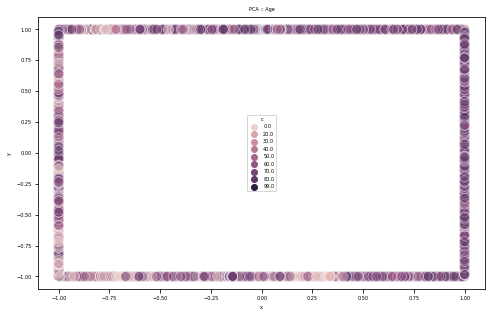

In [29]:
#Le graphique ci-desous est pour nous difficile à commenter
plt.figure(figsize=(8,5))
s = sns.scatterplot(
    x="x", y="y",
    hue="c",
    #palette=sns.color_palette(sns.color_palette("tab10"), n_colors=9),
    data=f,
    s=100,
    legend="full",
    alpha=.5,
)
s.set_title("PCA :: Age")

In [29]:
#Analyse TSNE
X_embedded = TSNE(n_components=2, learning_rate=20, n_iter=1000, perplexity=64, n_jobs=-1).fit_transform(basewonawoindic_scaled[0:100000])

In [30]:
#Sauvegarde du résultat
np.savetxt("C:/Users/simon/Desktop/Notebook_Jupyter/tsne_VF.csv", X_embedded, delimiter=",")

In [31]:
#Récupération du résultat
X_embedded_loaded = np.loadtxt(open('C:/Users/simon/Desktop/Notebook_Jupyter/tsne_VF.csv',"rb"), delimiter=",", skiprows=0)

In [32]:
#Vérification du chargement
X_embedded_loaded.shape

(100000, 2)

In [33]:
X_embedded.shape

(100000, 2)

In [34]:
X_embedded == X_embedded_loaded

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

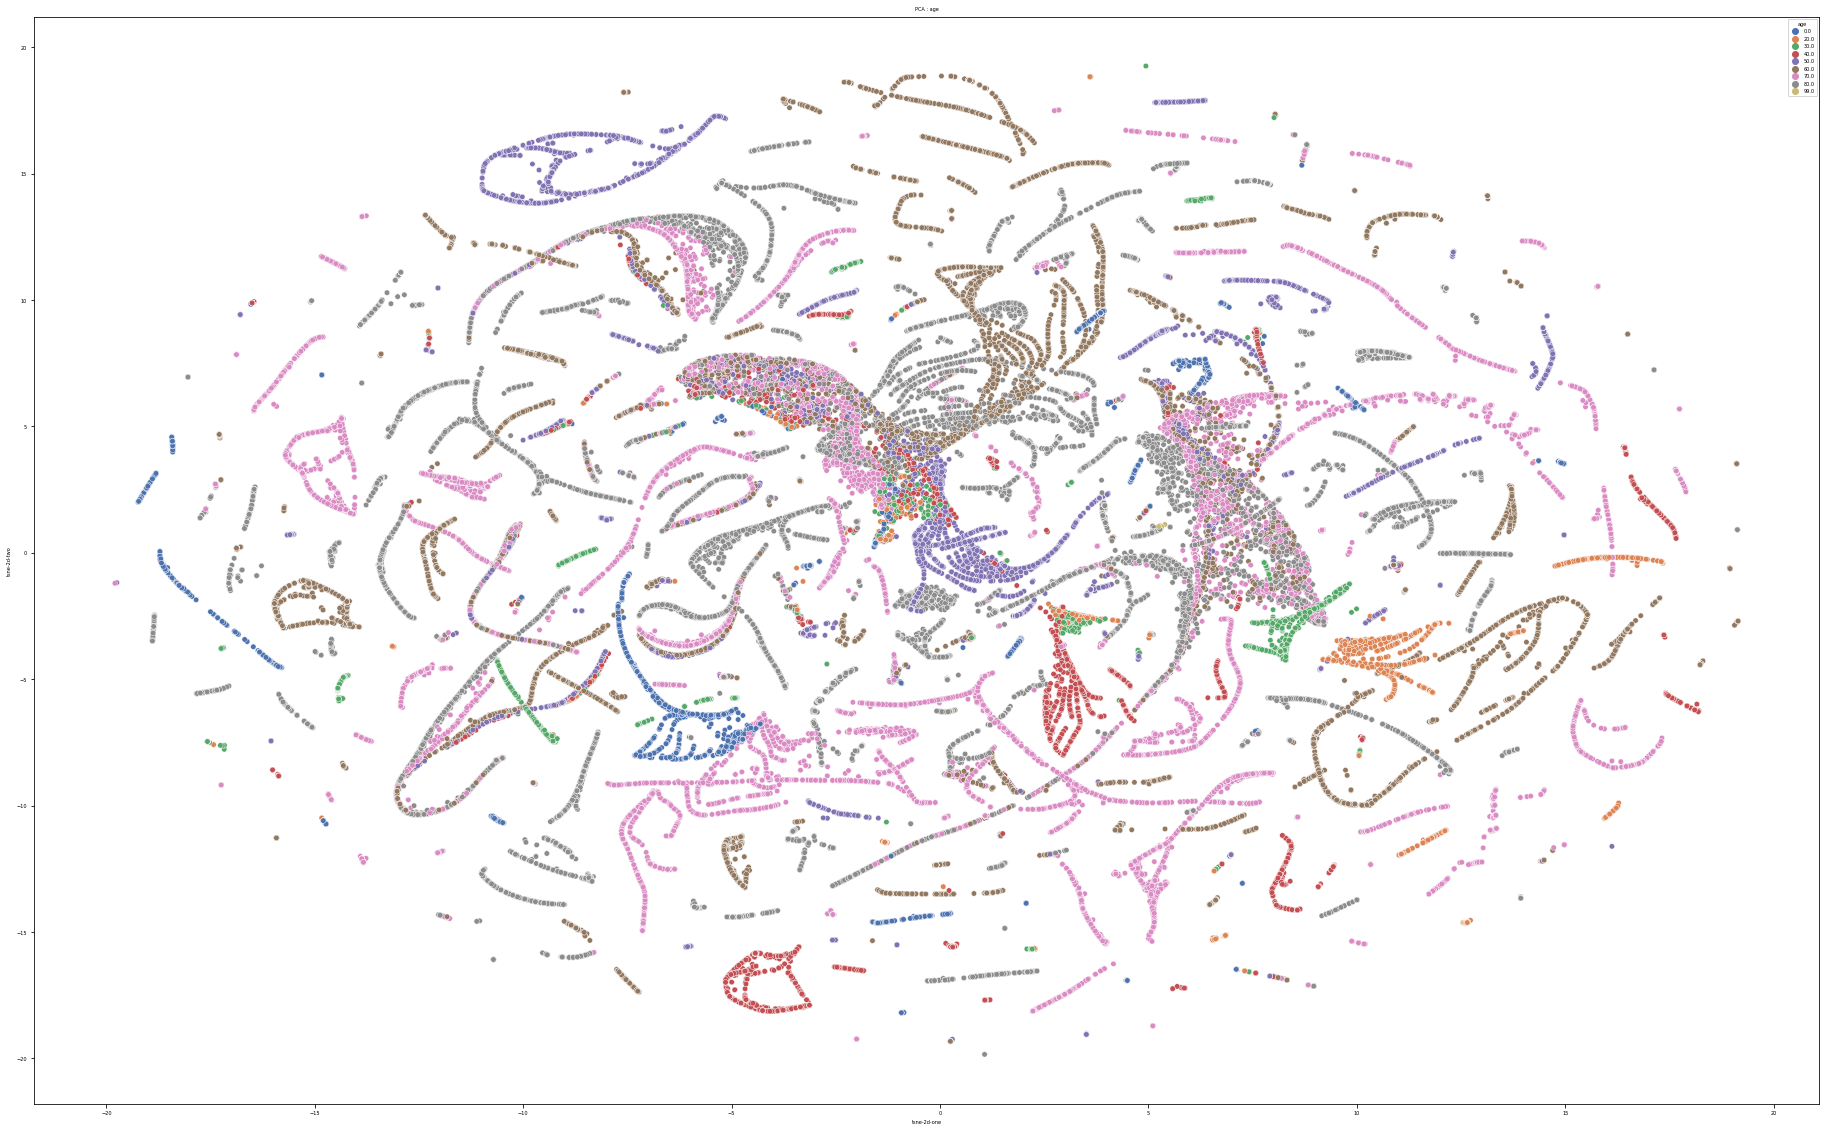

In [36]:
#Visualisation du TSNE
# my_colors = ['#fffffd00','#fffffe00','#ffffff00','#fffffc00','#990000','#992222']
f=pd.DataFrame()
f['tsne-2d-one'] = X_embedded[:,0]
f['tsne-2d-two'] = X_embedded[:,1]
f['age'] = basewonawoindic2.AGE_BEN_SNDS
plt.figure(figsize=(32,20))
s = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue="age",
    palette = 'deep',
    data=f,
    s=30,
    legend="full",
    alpha=1,
    edgecolors='none',
)
s.set_title("PCA : age")
plt.savefig("C:/Users/simon/Desktop/Notebook_Jupyter/baseVF-pca-age.png")

In [ ]:
#D'après la visualisation de notre TSNE, on ne remarque pas de réels clusters bien qu'il semble y avoir quelques
#corrélations entre certaines variables. De plus, on constate une dominante de la couleur rose. Cependant, nous n'avons pas 
#réussi à savoir la signification de cette couleur (variable "AGE_BEN_SNDS").
#Enfin, il semble y avoir un phénomène de colinéarité entre les variables puisque l'on observe "des lignes".

In [37]:
#Apprentissage suppervisé

#Importation des librairies
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.experimental import enable_hist_gradient_boosting 

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.neural_network import MLPClassifier

In [38]:
#Préaparation du jeu de données

#Avec les âges inconnus
base_age_unknow = basewonawoindic2[base_scaled.AGE_BEN_SNDS == 99]
base_age_unknow.head()

,AGE_BEN_SNDS,PRS_ACT_COG,PRS_ACT_QTE,FLT_ACT_COG,PRS_REM_MNT,FLT_REM_MNT,PRS_REM_BSE,FLT_PAI_MNT,PRS_PAI_MNT,PRS_REM_TAU,...,PRS_NAT_3541,DDP_SPE_COD_121,ETE_TYP_SNDS_99,ETE_REG_COD_99,EXO_MTF_99,DRG_AFF_NAT_99,BEN_CMU_TOP_9,PRS_REM_TYP_99,EXE_INS_REG_99,PRS_NAT_3551
42075,99.0,-0.294934,-0.29493,-0.291559,-0.100356,-0.098734,-0.120801,-0.280119,-0.284502,1.283956,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
42082,99.0,-0.294934,-0.29493,-0.291559,-0.106681,-0.105058,-0.127099,-0.285076,-0.289462,1.283956,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
43483,99.0,-0.294934,-0.29493,-0.291559,-0.198221,-0.196582,-0.211821,-0.350681,-0.355115,-0.698783,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
44739,99.0,-0.294934,-0.29493,-0.291559,-0.198223,-0.196584,-0.211821,-0.349878,-0.354310,-0.698783,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
45499,99.0,-0.294934,-0.29493,-0.291559,-0.206604,-0.204964,-0.225736,-0.343656,-0.348084,-0.698783,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [39]:
#Avec les âges connus
base_age_know = basewonawoindic2[base_scaled.AGE_BEN_SNDS != 99]
base_age_know.head()

,AGE_BEN_SNDS,PRS_ACT_COG,PRS_ACT_QTE,FLT_ACT_COG,PRS_REM_MNT,FLT_REM_MNT,PRS_REM_BSE,FLT_PAI_MNT,PRS_PAI_MNT,PRS_REM_TAU,...,PRS_NAT_3541,DDP_SPE_COD_121,ETE_TYP_SNDS_99,ETE_REG_COD_99,EXO_MTF_99,DRG_AFF_NAT_99,BEN_CMU_TOP_9,PRS_REM_TYP_99,EXE_INS_REG_99,PRS_NAT_3551
0,50.0,0.624992,0.624996,0.627605,-0.002263,-0.000659,0.113386,1.070678,1.067279,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,-0.211304,-0.211301,-0.207999,-0.205524,-0.203883,-0.223940,-0.330511,-0.334930,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,0.875881,0.875885,0.878286,-0.201554,-0.199914,-0.217351,-0.324455,-0.328870,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,0.708622,0.708625,0.711166,0.347885,0.349427,0.694483,3.475726,3.474076,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,0.708622,0.708625,0.711166,0.308185,0.309735,0.628599,3.346109,3.344365,-0.698783,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#Séparation du jeux d'apprentissage entre les variables(x) et la cible(y)
base_X = base_age_know[["AGE_BEN_SNDS","PRS_ACT_COG","PRS_ACT_QTE","FLT_ACT_COG","PRS_REM_MNT","FLT_REM_MNT","PRS_REM_BSE",
                        "FLT_PAI_MNT","PRS_PAI_MNT","PRS_REM_TAU","FLT_DEP_MNT","PRS_DEP_MNT","DRG_AFF_NAT_11",
                        "EXE_INS_REG_53","PRS_NAT_3541","DDP_SPE_COD_121","ETE_TYP_SNDS_99","ETE_REG_COD_99","EXO_MTF_99",
                        "DRG_AFF_NAT_99","BEN_CMU_TOP_9","PRS_REM_TYP_99","EXE_INS_REG_99","PRS_NAT_3551"]]

In [44]:
base_Y = base_age_know[["AGE_BEN_SNDS"]]

In [45]:
base_X_age_unknow = base_age_unknow[["AGE_BEN_SNDS","PRS_ACT_COG","PRS_ACT_QTE","FLT_ACT_COG","PRS_REM_MNT","FLT_REM_MNT",
                                     "PRS_REM_BSE","FLT_PAI_MNT","PRS_PAI_MNT","PRS_REM_TAU","FLT_DEP_MNT","PRS_DEP_MNT",
                                     "DRG_AFF_NAT_11","EXE_INS_REG_53","PRS_NAT_3541","DDP_SPE_COD_121","ETE_TYP_SNDS_99",
                                     "ETE_REG_COD_99","EXO_MTF_99","DRG_AFF_NAT_99","BEN_CMU_TOP_9","PRS_REM_TYP_99",
                                     "EXE_INS_REG_99","PRS_NAT_3551"]]

In [46]:
#Découpage des jeux en base d'apprentissage et de tests
base_X_train, base_X_test, base_Y_train, base_Y_test = train_test_split(base_X.to_numpy(), base_Y.to_numpy(),
                                                                             test_size=0.33, random_state=42)

In [47]:
#Scalling data
scaler = StandardScaler()
scaler = RobustScaler()
base_X_train_scaled  = scaler.fit(base_X_train).transform(base_X_train)
base_X_test_scaled  = scaler.fit(base_X_test).transform(base_X_test)

In [48]:
#AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators = 100, random_state=0)
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

#D'après l'AdaBoost Classifier, on obtient un taux de prédiction de 79%. Cela signifie que si on utilise ce modèle pour
#faire de nouvelles prédictions (sur un nouveau jeu de données), alors on aura 79% de bonne prédiction.

0.7910405737826384

In [49]:
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

0.7910405737826384

In [51]:
#Bagging Classifier
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0, n_jobs=-1)

In [53]:
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

1.0

In [55]:
#Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=9, random_state=0, n_jobs=-1)
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

0.9969176965709374

In [56]:
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

0.9970362467028244

In [58]:
#Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

1.0

In [59]:
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=9, n_jobs=-1)
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

0.9831066062060994

In [60]:
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

0.9880116179129249

In [61]:
#Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

1.0

In [62]:
#Voting Classifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1, n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

In [63]:
eclf2 = VotingClassifier(estimators=[
                                    ('lr', clf1), 
                                    ('rf', clf2), 
                                    ('gnb', clf3)],
                         voting='soft')
eclf2 = eclf2.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

In [64]:
eclf3 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                         voting='soft', weights=[2,1,1],
                         flatten_transform=True)
eclf3 = eclf3.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

In [65]:
eclf1, eclf2, eclf3

(0.9920275036305978, 0.999881449868113, 0.9932574612489257)

In [66]:
#History Gradient Boosting
clf = HistGradientBoostingClassifier()
clf.fit(base_X_train, base_Y_train).score(base_X_test, base_Y_test)

1.0

In [67]:
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

1.0

In [69]:
#Categorical Naïve Bayesean Classifier
clf = ComplementNB()
scaler = MinMaxScaler()
base_X_train_scaled  = scaler.fit(base_X_train).transform(base_X_train)
base_X_test_scaled  = scaler.fit(base_X_test).transform(base_X_test)
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

0.2385228653566877

In [70]:
#Multi-layer Perceptron classifier
clf = MLPClassifier(random_state=1, max_iter=1000, verbose=True, solver='sgd', learning_rate='adaptive', early_stopping=True).fit(base_X_train, base_Y_train)
clf.fit(base_X_train_scaled, base_Y_train).score(base_X_test_scaled, base_Y_test)

Iteration 1, loss = 1.48876945
Validation score: 0.250347
Iteration 2, loss = 1.26268411
Validation score: 0.326400
Iteration 3, loss = 1.15814486
Validation score: 0.351142
Iteration 4, loss = 1.06708978
Validation score: 0.533027
Iteration 5, loss = 0.99991914
Validation score: 0.555653
Iteration 6, loss = 0.93333407
Validation score: 0.796292
Iteration 7, loss = 0.87884424
Validation score: 0.698562
Iteration 8, loss = 0.82823838
Validation score: 0.874754
Iteration 9, loss = 0.78979946
Validation score: 0.741698
Iteration 10, loss = 0.74997469
Validation score: 0.851909
Iteration 11, loss = 0.70937717
Validation score: 0.430917
Iteration 12, loss = 0.67693889
Validation score: 0.895847
Iteration 13, loss = 0.64466532
Validation score: 0.926502
Iteration 14, loss = 0.61667549
Validation score: 0.566528
Iteration 15, loss = 0.59625724
Validation score: 0.935844
Iteration 16, loss = 0.56583557
Validation score: 0.507773
Iteration 17, loss = 0.54278116
Validation score: 0.718780
Iterat

0.9995850745383954